# EDA on Sales of Used Ford Cars (1996-2020)

For an overall understanding of the dataset used and the types of exploratory data analysis performed in this notebook, please go through the Readme file attached under the respective repository. 

**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading and viewing the dataset**

In [2]:
df = pd.read_csv("ford.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


None

**Overview of the dataset:**

- Total number of observations/rows: 17964 
- Total number of variables/columns: 8
- Total number of categorical variables: 3
- Total number of numerical variables: 5
- No missing data

In [4]:
# Creating Descriptive Statistics table
df.describe()

,year,price,mileage,mpg,engineSize
count,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000
mean,2016.864173,12280.078435,23361.880149,57.907832,1.350824
std,2.024987,4741.318119,19471.243292,10.125632,0.432383
min,1996.000000,495.000000,1.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,58.900000,1.200000
75%,2018.000000,15299.000000,31052.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,201.800000,5.000000


**Observations from the descriptive stat table:**
 - 50% of the data was collected between 2017 and 2020.
 - The average price of used cars is \\$12280. The lowest price is \\$495 and highest price is  \\$54995 while half of the observations show price below \\$11291. 
 - The mileage ranges from 1 to 177644, however, 75% of the observations shows mileage above 9987, with average at 23361.
 - The mpg varies from 20.8 to 201.
 - The engine size varies from 0 to 5L.

**Creating new dataframes**

This is to calculate the percentage of occurances of some variables and saving it under separate dataframes.
Easier and simpler way to the analyze the data is by defining a function.

In [5]:
def unique_val_count(data, column):
    #data is the names the dataframes that we are going to create by the code below
    #column is the name of the columns
    
    df_count = df[column].value_counts()
    # Here we are counting the values of the column
    
    df_count = pd.DataFrame(df_count)
    # Here we are creating separate dataframes of the columns
    
    df_count = df_count.reset_index()
    # Here we are resetting the names of the coloumns to "index" 
    
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    # Here we are changing the column name "index" to main dataframe's column name and main dataframe's column name to 'No_of_cars'
    
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    # Here we are finding the % of cars for each column/dataframe
    
    return df_count

**Naming new dataframes created from four variables of the main dataframe 'ford'**

In [6]:
model_count = unique_val_count(df, 'model')

year_count = unique_val_count(df, 'year')

transmission_count = unique_val_count(df, 'transmission')

fueltype_count = unique_val_count(df, 'fuelType')

**Sorting the new 'year_count' dataframe will arrange the 'year' column in ascending order**

In [7]:
year_count = year_count.sort_values(by='year')

**Creating barplots to visualize the newly created dataframes using function**

In [8]:
def barplot(data, column_x, color, rotation, yticks):
    # data will be the name of the dataframe
    # column_x is the column that willgo in x axis
    # rotation is to rotate the labels \
    # yticks will be the range/bins/class-intervals of y axis
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
  
    plt.title("Percentage of cars present for each " + column_x)
    
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    plt.xticks(rotation=rotation)
    # With rotation, it will rotate if required
    
    plt.yticks(yticks)
    # Here we are saying that yticks will be different for each dataframes

**Visualizing the barplots**

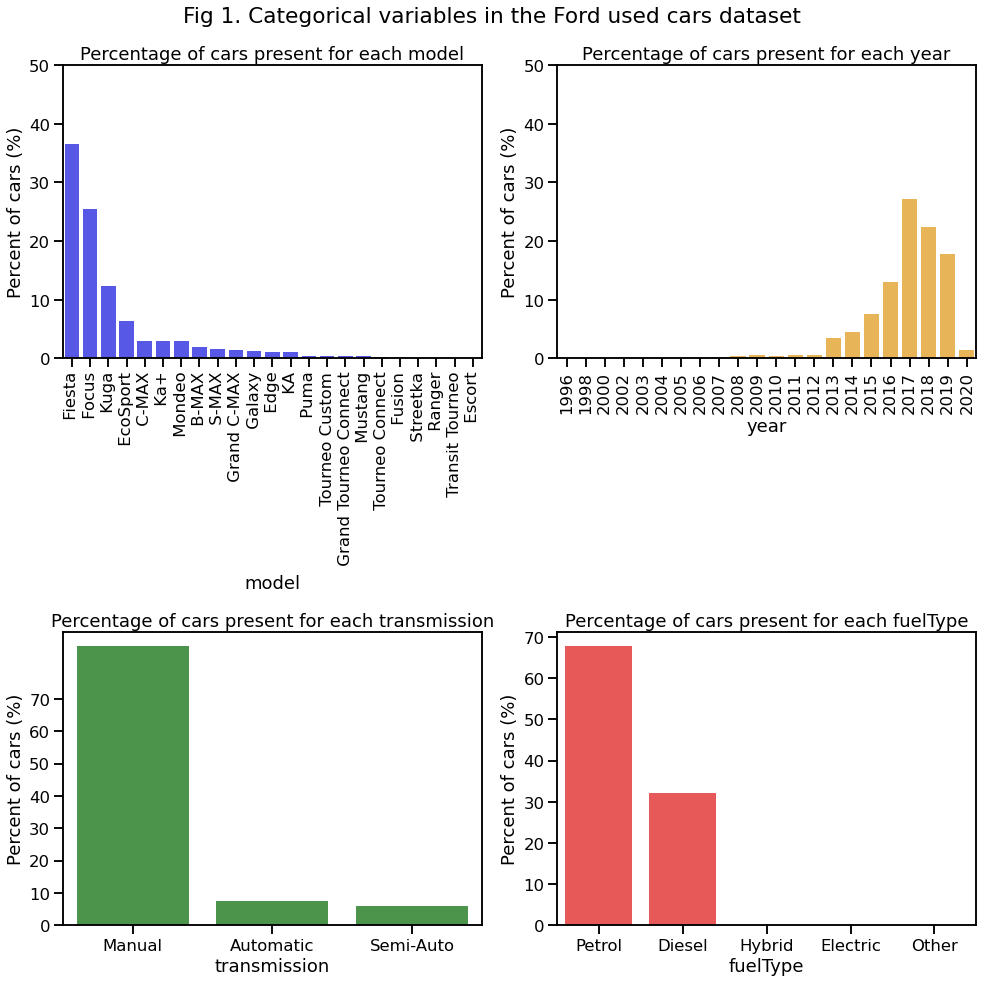

In [9]:
sns.set_context('talk')
# Here we are setting the layout of the graphs. Other options are 'book', 'paper'

plt.figure(figsize=(14,14))
# Here we are setting the size of the graph. (Width, Length/Height)

# Now we'll create subplots, which means now we can combine multiple graphs and show them together.
# To position them correctly, we'll use rows and columns numbers based on the graphs placements on the figure
# (Number of rows, Number of column, position of the graph)
# In total,there will be 4 graphs in 2 rows and 2 columns.

# Subplot 'model' will be in position 1 (i.e. 1st row, 1st column)
plt.subplot(2,2,1)
# (data, column_x, color, rotation, yticks)
# data = Dataframe = model_count, 
# column_x will have the name of column that will go in x axis; it changes depending of the dataframe since each dataframe has different column name for the column that will go in x axis
# yticks = will be the range/bins/class-intervals of y axis
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

# Subplot 'model' will be in position 2 (i.e. 1st row, 2nd column)
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(0,51,10))

# Subplot 'model' will be in position 3 (i.e. 2nd row, 1st column)
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

# Subplot 'model' will be in position 4 (i.e. 2nd row, 2nd column)
plt.subplot(2,2,4)
barplot(fueltype_count, 'fuelType', 'red', 0, np.arange(0,71,10))


plt.suptitle("Fig 1. Categorical variables in the Ford used cars dataset")

plt.tight_layout()
# tight_layout helps avoid overlapping of texts among graphs

plt.show()

In Fig 1., first graph shows the percentage of used Ford cars based of the model.
Second graph shows the percentage of used Ford cars per year, from 1996 to 2020.
Third graph shows the three variety of transmissions (manual, automatic and semi-automatic) and the percentage of each found in Ford used cars.
Fourth graph shows the percentage of used Ford cars with fuel types distributed among petrol, diesel, hybrid, electric or others.

**Price and its relationship with Mileage using Regression Plot (Scatterplot with Trendline)**

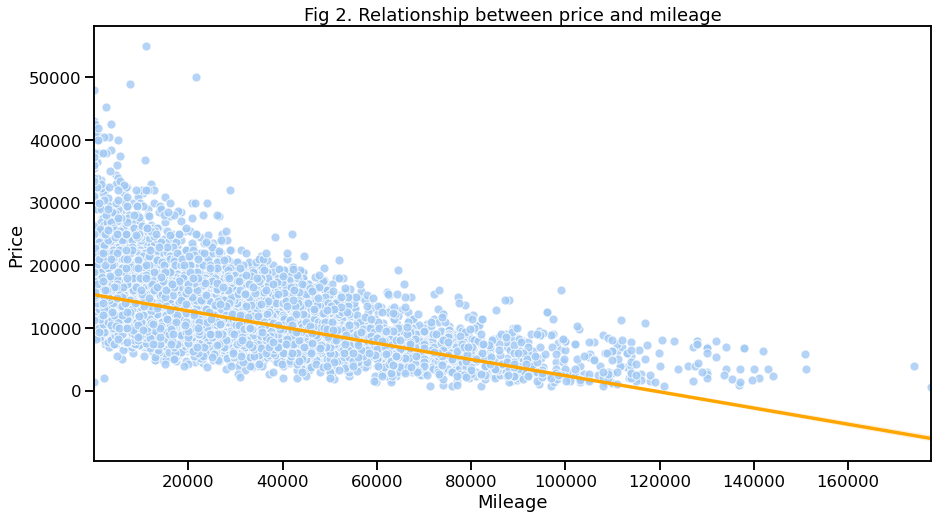

In [10]:
sns.set_palette("pastel")
# changing the color palette of the figures.

plt.figure(figsize=(15,8))

sns.regplot(x='mileage', y='price', data=df, scatter_kws={'edgecolor':'white'},  line_kws={'color':'orange'})
# To see each data point clearly, we can change the edge color by using the dictionary scatter_kws.

plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Fig 2. Relationship between price and mileage")

plt.yticks(np.arange(0, 55000, 10000))

plt.show()

Fig 2 shows that the price, which is a dependent variable, changes with changes in mileage. The trend shows that as mileage increases, the price of the used Ford cars decreases. Provided that, the figure also represents that after going certain mileage, the used Ford cars hold no value.

**Change in Price and Mileage, based on fuel types**

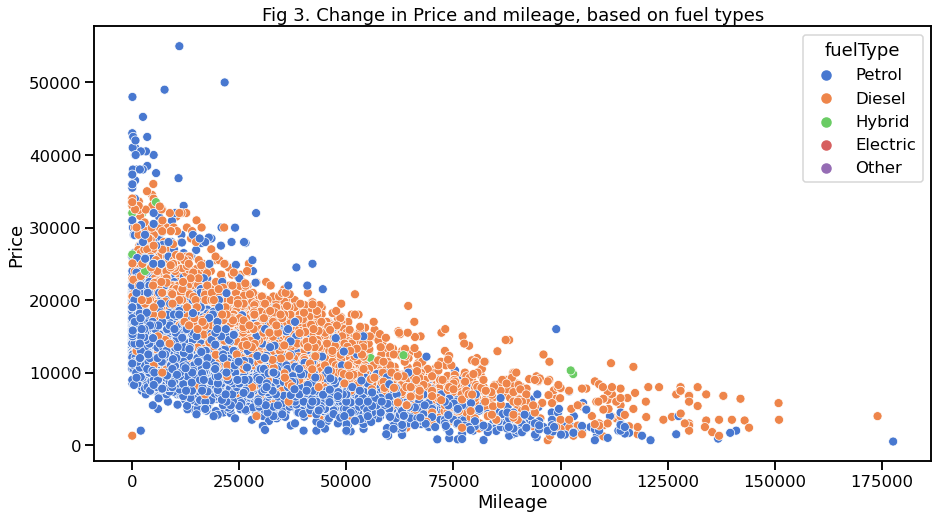

In [11]:
sns.set_palette("muted")
plt.figure(figsize=(15,8))

# hue is used to add categorical data into the analysis

sns.scatterplot(x='mileage', y='price', data=df, hue='fuelType')

plt.title("Fig 3. Change in Price and mileage, based on fuel types")
plt.xlabel("Mileage")
plt.ylabel("Price")

plt.show()

From Fig 3, it can be noted that the correlation between price and mileage (as explained in fig 2) is consistent when fuel type of the cars are petrol and diesel. Also, the price of diesel cars shows to be higher than that of petrol cars. Hybrid, electric and other type of fuel is under-epresented in the figure due to their negligible number of observations in the dataset. 

**Price Distribution using Distribution Plot**

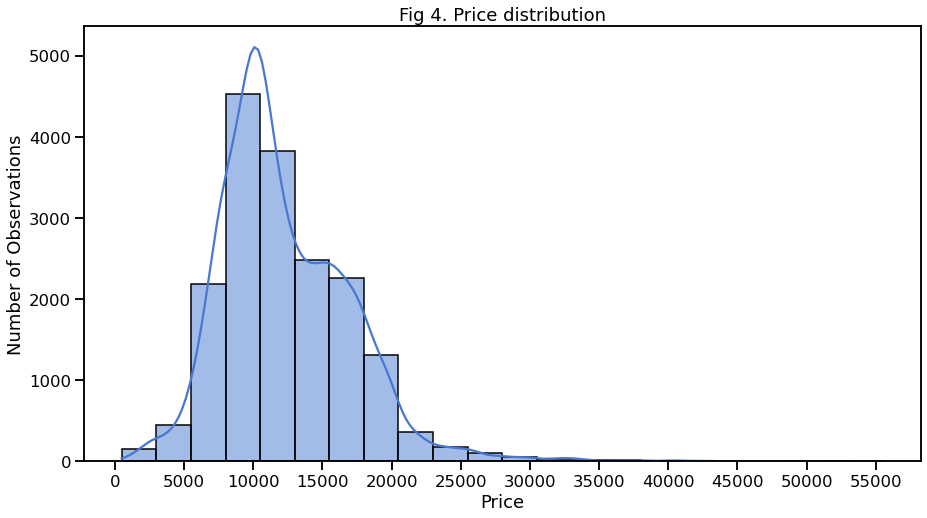

In [12]:
sns.set_palette("muted")
plt.figure(figsize=(15,8))

sns.histplot(data=df, x='price', binwidth=2500, kde=True)

plt.xticks(np.arange(0, 60000, 5000))

plt.xlabel("Price")
plt.ylabel("Number of Observations")
plt.title("Fig 4. Price distribution")

plt.show()

Fig 4. shows a unimodal distribution of price in the dataset with most of the used Ford cars sold for approximately \\$10,000. 

**Empirical Cumulative Distribution Function (ECDF) of Price**

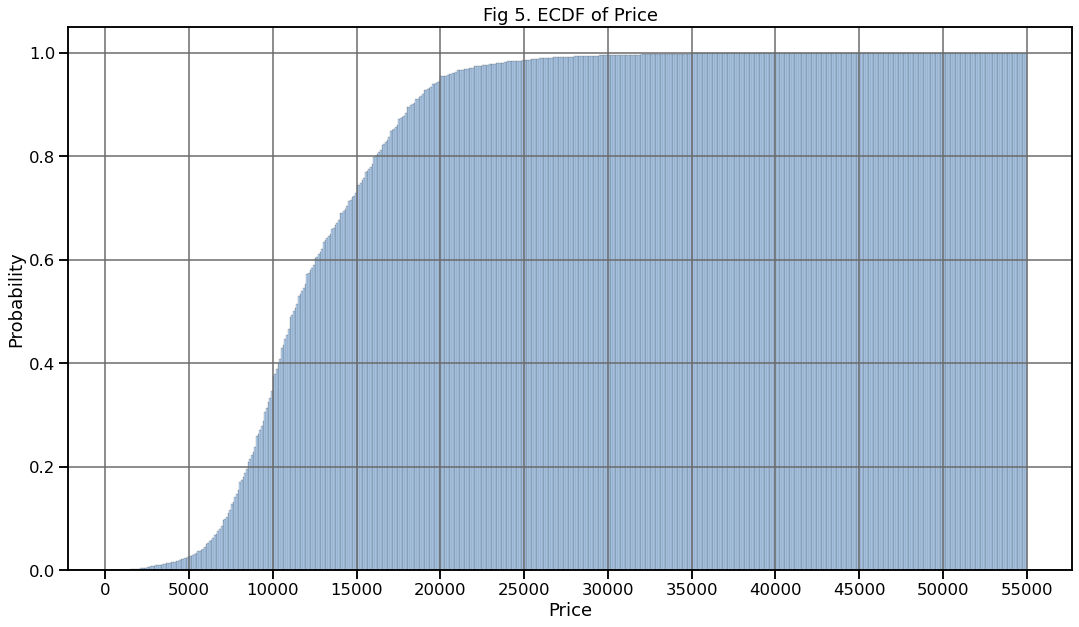

In [13]:
sns.set_palette("pastel")
plt.figure(figsize=(18,10))

sns.histplot(data=df, x='price', binwidth=100, cumulative=True, stat='probability')

plt.grid(color = 'dimgray')
plt.xticks(np.arange(0,60000,5000))
plt.xlabel("Price")
plt.ylabel("Probability")
plt.title("Fig 5. ECDF of Price")

plt.show()

Fig 5. represents the empiricial cumulative distribution of price of used Ford cars. The graph shows us the probablity of occurence of price at a given point. For example, the probablity of the price being less than or equal to \\$10,000 is approximately 0.4 and the probability of price being less than or equal to \\$15,000 is slightly more than 0.7. 

**Statistical summary of Price based on Transmission Types Using Box plot**

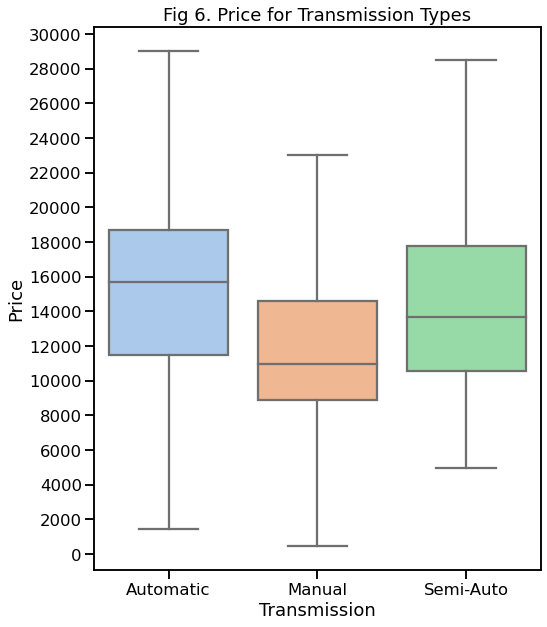

In [14]:
plt.figure(figsize=(8,10))

# creating boxplot using seaborn
sns.boxplot(x=df['transmission'], y=df['price'], showfliers=False)
# showfliers=False is used to exclude outliers

plt.yticks(np.arange(0, 30001, 2000))
plt.ylabel('Price')
plt.xlabel('Transmission')
plt.title('Fig 6. Price for Transmission Types')
plt.show()

Fig 6. shows the price of semi automatic cars although is the highest at the lowest observation, the price of automatic cars is more at highest observation. Even according to median value the price of automatic cars is observed to be higher at approximately \\$16,000. So, it can be said that the price of automatic cars varies significantly with 50% of the observations between approximately \\$11,000 and \\$19,000.